In [1]:
# Import setup
from setup.setup import *

In [2]:
# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# Set seaborn theme
sns.set_theme(style = 'darkgrid')

In [4]:
# Load and clean cdl data
cdlDF = load_and_clean_cdl_data()
cdlDF

c:\Users\David Harler Jr\OneDrive\Desktop\dataClass\06-cod-analysis\03 CDL PrizePicks Betting\cdl_prizepicks_betting\cdl-betting-app-v03\setup\setup.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cdlDF = sqlio.read_sql_query("SELECT * FROM cdl_data", conn)


,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,27301,2024-04-28,Sunday,Simp,Atlanta FaZe,4,Karachi,Hardpoint,29,21,...,1,W,ATL,FaZe,New York Subliners,NYSL,157,407,93,0
4556,27301,2024-04-28,Sunday,HyDra,New York Subliners,4,Karachi,Hardpoint,22,29,...,0,L,NYSL,Subliners,Atlanta FaZe,ATL,250,407,-93,0
4557,27301,2024-04-28,Sunday,KiSMET,New York Subliners,4,Karachi,Hardpoint,17,27,...,0,L,NYSL,Subliners,Atlanta FaZe,ATL,250,407,-93,0
4558,27301,2024-04-28,Sunday,Sib,New York Subliners,4,Karachi,Hardpoint,19,24,...,0,L,NYSL,Subliners,Atlanta FaZe,ATL,250,407,-93,0


In [5]:
# Check columns
cdlDF.columns

Index(['match_id', 'match_date', 'match_day', 'player', 'team', 'map_num',
       'map_name', 'gamemode', 'kills', 'deaths', 'kd', 'plus_minus', 'dmg',
       'team_score', 'map_result', 'series_result', 'map_wl', 'team_abbr',
       'team_icon', 'opp', 'opp_abbr', 'opp_score', 'total_score',
       'score_diff', 'dummy_x'],
      dtype='object')

In [6]:
# Drop columns
cdlDF = cdlDF.drop(['match_day', 'deaths', 'kd', 'plus_minus', 'dmg'], axis = 1)
cdlDF

,match_id,match_date,player,team,map_num,map_name,gamemode,kills,team_score,map_result,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,250,1,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,250,1,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,250,1,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,250,1,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,238,0,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,27301,2024-04-28,Simp,Atlanta FaZe,4,Karachi,Hardpoint,29,250,1,1,W,ATL,FaZe,New York Subliners,NYSL,157,407,93,0
4556,27301,2024-04-28,HyDra,New York Subliners,4,Karachi,Hardpoint,22,157,0,0,L,NYSL,Subliners,Atlanta FaZe,ATL,250,407,-93,0
4557,27301,2024-04-28,KiSMET,New York Subliners,4,Karachi,Hardpoint,17,157,0,0,L,NYSL,Subliners,Atlanta FaZe,ATL,250,407,-93,0
4558,27301,2024-04-28,Sib,New York Subliners,4,Karachi,Hardpoint,19,157,0,0,L,NYSL,Subliners,Atlanta FaZe,ATL,250,407,-93,0


In [7]:
# Updated cdlDF & Major 3 cdlDF
updated_cdl_DF = filter_maps(cdlDF).copy().reset_index(drop=True)
major_3_df = cdlDF[cdlDF["match_date"] >= np.datetime64('2024-04-12')].copy().reset_index(drop=True)

In [8]:
# Get All Map Mode Combos
all_map_mode_combos = cdlDF[['gamemode', 'map_name']].drop_duplicates().sort_values(['gamemode', 'map_name']).reset_index(drop = True)
all_map_mode_combos

,gamemode,map_name
0,Hardpoint,6 Star
1,Hardpoint,Invasion
2,Hardpoint,Karachi
3,Hardpoint,Rio
4,Hardpoint,Skidrow
5,Hardpoint,Sub Base
6,Hardpoint,Terminal
7,Hardpoint,Vista
8,Search & Destroy,6 Star
9,Search & Destroy,Highrise


In [9]:
# Check to see if any Map Mode Combos are unintenionally excluded from Maps 1 - 3
all_map_mode_combos_1_thru_3 = cdlDF[cdlDF["map_num"] <= 3][['gamemode', 'map_name']].drop_duplicates().sort_values(['gamemode', 'map_name']).reset_index(drop = True)
all_map_mode_combos_1_thru_3

,gamemode,map_name
0,Hardpoint,6 Star
1,Hardpoint,Invasion
2,Hardpoint,Karachi
3,Hardpoint,Rio
4,Hardpoint,Skidrow
5,Hardpoint,Sub Base
6,Hardpoint,Terminal
7,Hardpoint,Vista
8,Search & Destroy,6 Star
9,Search & Destroy,Highrise


In [10]:
# Major 3 Map Mode Combos
major_3_map_mode_combos = major_3_df[['gamemode', 'map_name']].drop_duplicates().sort_values(['gamemode', 'map_name']).reset_index(drop = True)
major_3_map_mode_combos

,gamemode,map_name
0,Hardpoint,6 Star
1,Hardpoint,Karachi
2,Hardpoint,Rio
3,Hardpoint,Sub Base
4,Hardpoint,Vista
5,Search & Destroy,6 Star
6,Search & Destroy,Highrise
7,Search & Destroy,Invasion
8,Search & Destroy,Karachi
9,Search & Destroy,Rio


In [11]:
# 'Almost' Full Season Map Mode Combos
full_season_map_mode_combos = major_3_map_mode_combos[
    (major_3_map_mode_combos["map_name"] != "6 Star") &
    (major_3_map_mode_combos["map_name"] != "Vista")
].reset_index(drop=True)

full_season_map_mode_combos

,gamemode,map_name
0,Hardpoint,Karachi
1,Hardpoint,Rio
2,Hardpoint,Sub Base
3,Search & Destroy,Highrise
4,Search & Destroy,Invasion
5,Search & Destroy,Karachi
6,Search & Destroy,Rio
7,Control,Highrise
8,Control,Invasion
9,Control,Karachi


In [12]:
# Removed Map Mode Combos
removed_map_mode_combos = pd.merge(all_map_mode_combos, major_3_map_mode_combos, on=['gamemode', 'map_name'], how='left', indicator=True)
removed_map_mode_combos = removed_map_mode_combos[removed_map_mode_combos['_merge'] == 'left_only'].drop(columns=['_merge']).reset_index(drop=True)
removed_map_mode_combos

,gamemode,map_name
0,Hardpoint,Invasion
1,Hardpoint,Skidrow
2,Hardpoint,Terminal
3,Search & Destroy,Skidrow
4,Search & Destroy,Terminal


In [13]:
# Compute Total Number of Matches
number_of_matches = len(cdlDF["match_id"].unique())
number_of_matches

145

In [14]:
# Value Counts for all Map & Mode Combos
all_map_mode_value_counts = cdlDF[['match_id', 'gamemode', 'map_name']].drop_duplicates() \
    .groupby(['gamemode', 'map_name'], observed = True).size().reset_index(name='count') \
    .sort_values(['gamemode', 'count'], ignore_index = True, ascending = [True, False])
all_map_mode_value_counts

,gamemode,map_name,count
0,Hardpoint,Karachi,47
1,Hardpoint,Invasion,45
2,Hardpoint,Skidrow,37
3,Hardpoint,Sub Base,37
4,Hardpoint,Rio,36
5,Hardpoint,Terminal,16
6,Hardpoint,Vista,10
7,Hardpoint,6 Star,9
8,Search & Destroy,Invasion,53
9,Search & Destroy,Karachi,44


In [15]:
# Check value counts by adding control totals: one control per match, 
# so sum of control totals should equal total number of matches
all_map_mode_value_counts['count'][-3:].sum()

145

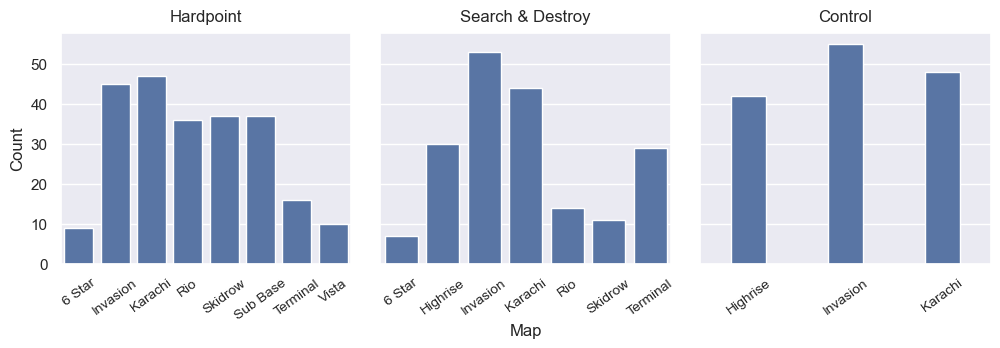

In [16]:
# Faceted Histograms of Map & Mode Value Counts 
queried_df = all_map_mode_value_counts.sort_values(['gamemode', 'map_name'], ignore_index = True)

# Create figure with gridspec
f, axs = plt.subplots(1, 3, figsize = (12, 3), gridspec_kw = dict(wspace = 0.1), sharey = True)

# Bar Plots
sns.barplot(
    queried_df[queried_df["gamemode"] == "Hardpoint"], 
    x = "map_name" ,y = "count", errorbar = None, ax = axs[0]
)

sns.barplot(
    queried_df[queried_df["gamemode"] == "Search & Destroy"], 
    x = "map_name", y = "count", errorbar = None, ax = axs[1]
)

sns.barplot(
    queried_df[queried_df["gamemode"] == "Control"], 
    x = "map_name",y = "count", errorbar = None, ax = axs[2], 
    width = 0.36
)

# Styling
axs[0].set_title("Hardpoint", fontsize = 12, pad = 8)
axs[1].set_title("Search & Destroy", fontsize = 12, pad = 8)
axs[2].set_title("Control", fontsize = 12, pad = 8)

axs[0].set_xlabel("")
axs[1].set_xlabel("Map")
axs[2].set_xlabel("")

axs[0].set_ylabel("Count")

axs[0].tick_params(axis = 'x', rotation = 36, labelsize = 10)
axs[1].tick_params(axis = 'x', rotation = 36, labelsize = 10)
axs[2].tick_params(axis = 'x', rotation = 36, labelsize = 10)

In [17]:
# Compute Total Number of Matches during Major 3
major_3_matches = len(major_3_df["match_id"].unique())
major_3_matches

25

In [18]:
# Value Counts for all Major 3 Map & Mode Combos
major_3_map_mode_value_counts = major_3_df[['match_id', 'gamemode', 'map_name']].drop_duplicates() \
    .groupby(['gamemode', 'map_name'], observed = True).size().reset_index(name='count') \
    .sort_values(['gamemode', 'count'], ignore_index = True, ascending = [True, False])
major_3_map_mode_value_counts

,gamemode,map_name,count
0,Hardpoint,Vista,10
1,Hardpoint,6 Star,9
2,Hardpoint,Karachi,9
3,Hardpoint,Rio,9
4,Hardpoint,Sub Base,4
5,Search & Destroy,Highrise,8
6,Search & Destroy,6 Star,7
7,Search & Destroy,Invasion,7
8,Search & Destroy,Rio,7
9,Search & Destroy,Karachi,5


In [19]:
# Check value counts by adding control totals: one control per match, 
# so sum of control totals should equal total number of matches
major_3_map_mode_value_counts['count'][-3:].sum()

25

C:\Users\David Harler Jr\AppData\Local\Temp\ipykernel_18884\623658066.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


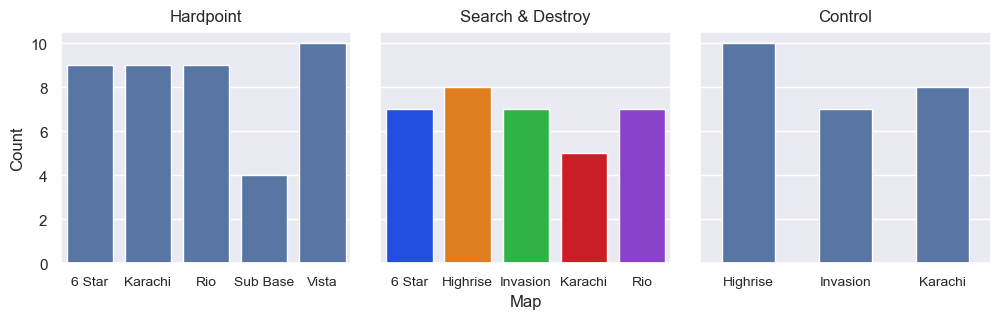

In [67]:
# Faceted Histograms of Map & Mode Value Counts for Major 3 

queried_df = major_3_map_mode_value_counts.sort_values(['gamemode', 'map_name'], ignore_index = True)

# Create figure with gridspec
f, axs = plt.subplots(1, 3, figsize = (12, 3), gridspec_kw = dict(wspace = 0.1), sharey = True)

# Bar Plots
sns.barplot(
    queried_df[queried_df["gamemode"] == "Hardpoint"], 
    x = "map_name" ,y = "count", errorbar = None, ax = axs[0]
)

sns.barplot(
    queried_df[queried_df["gamemode"] == "Search & Destroy"], 
    x = "map_name", y = "count", errorbar = None, ax = axs[1]
)

sns.barplot(
    queried_df[queried_df["gamemode"] == "Control"], 
    x = "map_name",y = "count", errorbar = None, ax = axs[2], 
    width = 0.55
)

# Styling
axs[0].set_title("Hardpoint", fontsize = 12, pad = 8)
axs[1].set_title("Search & Destroy", fontsize = 12, pad = 8)
axs[2].set_title("Control", fontsize = 12, pad = 8)

axs[0].set_xlabel("")
axs[1].set_xlabel("Map")
axs[2].set_xlabel("")

axs[0].set_ylabel("Count")

axs[0].tick_params(axis = 'x', labelsize = 10)
axs[1].tick_params(axis = 'x', labelsize = 10)
axs[2].tick_params(axis = 'x', labelsize = 10)

In [47]:
# Hardpoint Value Counts Map 1 vs Map 4: Full Season
full_season_hp_value_counts = cdlDF \
    [cdlDF['gamemode'] == 'Hardpoint'] \
    [['match_id', 'map_name', 'map_num']].drop_duplicates() \
    .groupby(['map_num', 'map_name'], observed = True).size().reset_index(name='count') \
    .sort_values(['map_num', 'count'], ignore_index = True, ascending = [True, False])

full_season_hp_value_counts_pivot = full_season_hp_value_counts \
    .pivot(index = 'map_name', columns = 'map_num', values = 'count')

full_season_hp_value_counts_pivot = full_season_hp_value_counts_pivot.reset_index().rename_axis(columns={'map_num': ''})

full_season_hp_value_counts_pivot

,map_name,1,4
0,6 Star,7,2
1,Invasion,29,16
2,Karachi,35,12
3,Rio,20,16
4,Skidrow,22,15
5,Sub Base,19,18
6,Terminal,7,9
7,Vista,6,4


In [46]:
# Hardpoint Value Counts Map 1 vs Map 4: Major 3 Only
major_3_hp_value_counts = major_3_df \
    [major_3_df['gamemode'] == 'Hardpoint'] \
    [['match_id', 'map_name', 'map_num']].drop_duplicates() \
    .groupby(['map_num', 'map_name'], observed = True).size().reset_index(name='count') \
    .sort_values(['map_num', 'count'], ignore_index = True, ascending = [True, False])

major_3_hp_value_counts_pivot = major_3_hp_value_counts \
    .pivot(index = 'map_name', columns = 'map_num', values = 'count')

major_3_hp_value_counts_pivot = major_3_hp_value_counts_pivot.reset_index().rename_axis(columns={'map_num': ''})

major_3_hp_value_counts_pivot

,map_name,1,4
0,6 Star,7,2
1,Karachi,6,3
2,Rio,4,5
3,Sub Base,2,2
4,Vista,6,4


In [49]:
# Hardpoint Value Counts Map 1 vs Map 4: Removed Maps

queried_df = pd.merge(removed_map_mode_combos, cdlDF, on=['gamemode', 'map_name'], how='left').reset_index(drop = True)

removed_hp_value_counts = queried_df \
    [queried_df['gamemode'] == 'Hardpoint'] \
    [['match_id', 'map_name', 'map_num']].drop_duplicates() \
    .groupby(['map_num', 'map_name'], observed = True).size().reset_index(name='count') \
    .sort_values(['map_num', 'count'], ignore_index = True, ascending = [True, False])

removed_hp_value_counts_pivot = removed_hp_value_counts \
    .pivot(index = 'map_name', columns = 'map_num', values = 'count')

removed_hp_value_counts_pivot = removed_hp_value_counts_pivot.reset_index().rename_axis(columns={'map_num': ''})

removed_hp_value_counts_pivot

,map_name,1,4
0,Invasion,29,16
1,Skidrow,22,15
2,Terminal,7,9


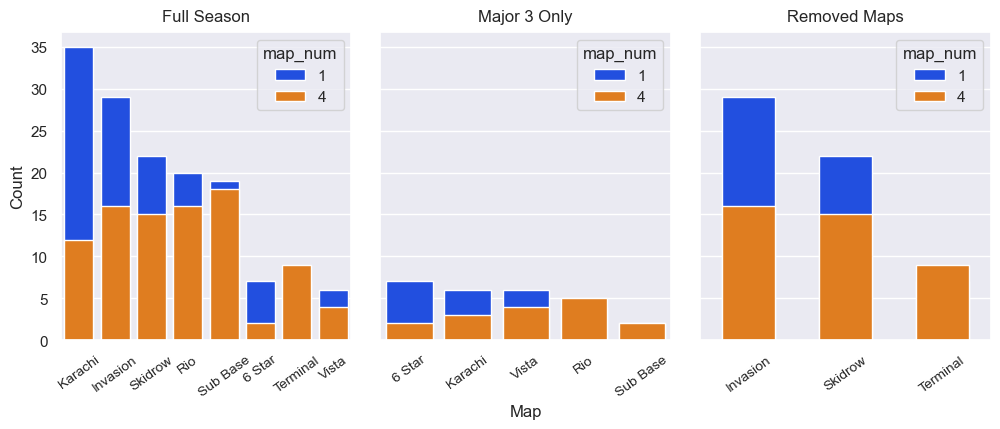

In [70]:
# Faceted Histograms of Hardpoint Value Counts Map 1 vs Map 4 by Group

# Create figure with gridspec
f, axs = plt.subplots(1, 3, figsize = (12, 4), gridspec_kw = dict(wspace = 0.1), sharey = True)

# Bar Plots
sns.barplot(
    full_season_hp_value_counts, hue = "map_num", dodge = False,
    x = "map_name", y = "count", errorbar = None, ax = axs[0], 
    palette = "bright"
)

sns.barplot(
    major_3_hp_value_counts, hue = "map_num", dodge = False,
    x = "map_name", y = "count", errorbar = None, ax = axs[1], 
    palette = "bright"
)

sns.barplot(
    removed_hp_value_counts, hue = "map_num", dodge = False, 
    x = "map_name", y = "count", errorbar = None, ax = axs[2], 
    palette = "bright", width = 0.55
)

# Styling
axs[0].set_title("Full Season", fontsize = 12, pad = 8)
axs[1].set_title("Major 3 Only", fontsize = 12, pad = 8)
axs[2].set_title("Removed Maps", fontsize = 12, pad = 8)

axs[0].set_xlabel("")
axs[1].set_xlabel("Map")
axs[2].set_xlabel("")

axs[0].set_ylabel("Count")

axs[0].tick_params(axis = 'x', rotation = 36, labelsize = 10)
axs[1].tick_params(axis = 'x', rotation = 36, labelsize = 10)
axs[2].tick_params(axis = 'x', rotation = 36, labelsize = 10)

In [69]:
sns.color_palette("bright")

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [24]:
# Search & Destroy Value Counts Map 2 vs Map 5: Full Season
full_season_snd_value_counts = cdlDF \
    [cdlDF['gamemode'] == 'Search & Destroy'] \
    [['match_id', 'map_name', 'map_num']].drop_duplicates() \
    .groupby(['map_num', 'map_name'], observed = True).size().reset_index(name='count') \
    .sort_values(['map_num', 'count'], ignore_index = True, ascending = [True, False])

full_season_snd_value_counts = full_season_snd_value_counts \
    .pivot(index = 'map_name', columns = 'map_num', values = 'count')

full_season_snd_value_counts = full_season_snd_value_counts.reset_index().rename_axis(columns={'map_num': ''})

full_season_snd_value_counts

,map_name,2,5
0,6 Star,2,5
1,Highrise,24,6
2,Invasion,43,10
3,Karachi,34,10
4,Rio,12,2
5,Skidrow,8,3
6,Terminal,22,7


In [43]:
# Search & Destroy Value Counts Map 2 vs Map 5: Major 3 Only
major_3_snd_value_counts = major_3_df \
    [major_3_df['gamemode'] == 'Search & Destroy'] \
    [['match_id', 'map_name', 'map_num']].drop_duplicates() \
    .groupby(['map_num', 'map_name'], observed = True).size().reset_index(name='count') \
    .sort_values(['map_num', 'count'], ignore_index = True, ascending = [True, False])

major_3_snd_value_counts = major_3_snd_value_counts \
    .pivot(index = 'map_name', columns = 'map_num', values = 'count')

major_3_snd_value_counts = major_3_snd_value_counts.reset_index().rename_axis(columns={'map_num': ''})

major_3_snd_value_counts = major_3_snd_value_counts.fillna(0)

major_3_snd_value_counts[2] = major_3_snd_value_counts[2].astype(int)
major_3_snd_value_counts[5] = major_3_snd_value_counts[5].astype(int)

major_3_snd_value_counts

,map_name,2,5
0,6 Star,2,5
1,Highrise,6,2
2,Invasion,6,1
3,Karachi,4,1
4,Rio,7,0


In [26]:
# Search & Destroy Value Counts Map 2 vs Map 5: Removed Maps

queried_df = pd.merge(removed_map_mode_combos, cdlDF, on=['gamemode', 'map_name'], how='left').reset_index(drop = True)

removed_snd_value_counts = queried_df \
    [queried_df['gamemode'] == 'Search & Destroy'] \
    [['match_id', 'map_name', 'map_num']].drop_duplicates() \
    .groupby(['map_num', 'map_name'], observed = True).size().reset_index(name='count') \
    .sort_values(['map_num', 'count'], ignore_index = True, ascending = [True, False])

removed_snd_value_counts = removed_snd_value_counts \
    .pivot(index = 'map_name', columns = 'map_num', values = 'count')

removed_snd_value_counts = removed_snd_value_counts.reset_index().rename_axis(columns={'map_num': ''})

removed_snd_value_counts

,map_name,2,5
0,Skidrow,8,3
1,Terminal,22,7


In [27]:
# Ratio of Map 1s to Map 4s
map_1s = len(cdlDF[cdlDF["map_num"] == 1]["match_id"].unique())
map_4s = len(cdlDF[cdlDF["map_num"] == 4]["match_id"].unique())

print("Full Season")
print("-------------")
print("")
print(f"Map 1s   Map 4s   Ratio")
print(f"{map_1s}      {map_4s}       {map_1s / map_4s:.2f}")

Full Season
-------------

Map 1s   Map 4s   Ratio
145      92       1.58


In [28]:
# Ratio of Map 1s to Map 4s after filtering for maps
map_1s = len(updated_cdl_DF[updated_cdl_DF["map_num"] == 1]["match_id"].unique())
map_4s = len(updated_cdl_DF[updated_cdl_DF["map_num"] == 4]["match_id"].unique())

print("Filtered Map Pool")
print("-------------")
print("")
print(f"Map 1s   Map 4s   Ratio")
print(f"{map_1s}       {map_4s}       {map_1s / map_4s:.2f}")

Filtered Map Pool
-------------

Map 1s   Map 4s   Ratio
87       52       1.67


In [29]:
# Ratio of Map 1s to Map 4s: Major 3 Only
map_1s = len(major_3_df[major_3_df["map_num"] == 1]["match_id"].unique())
map_4s = len(major_3_df[major_3_df["map_num"] == 4]["match_id"].unique())

print("Major 3 Only")
print("-------------")
print("")
print(f"Map 1s   Map 4s   Ratio")
print(f"{map_1s}       {map_4s}       {map_1s / map_4s:.2f}")

Major 3 Only
-------------

Map 1s   Map 4s   Ratio
25       16       1.56


In [30]:
# Ratio of Map 2s to Map 5s
map_2s = len(cdlDF[cdlDF["map_num"] == 2]["match_id"].unique())
map_5s = len(cdlDF[cdlDF["map_num"] == 5]["match_id"].unique())

print("Full Season")
print("-------------")
print("")
print(f"Map 2s   Map 5s   Ratio")
print(f"{map_2s}      {map_5s}       {map_2s / map_5s:.2f}")

Full Season
-------------

Map 2s   Map 5s   Ratio
145      43       3.37


In [31]:
# Ratio of Maps 2s to Map 5s after filtering for maps
map_2s = len(updated_cdl_DF[updated_cdl_DF["map_num"] == 2]["match_id"].unique())
map_5s = len(updated_cdl_DF[updated_cdl_DF["map_num"] == 5]["match_id"].unique())

print("Filtered Map Pool")
print("-------------")
print("")
print(f"Map 2s   Map 5s   Ratio")
print(f"{map_2s}      {map_5s}       {map_2s / map_5s:.2f}")

Filtered Map Pool
-------------

Map 2s   Map 5s   Ratio
115      33       3.48


In [32]:
# Ratio of Map 2s to Map 5s: Stage 3 Only
map_2s = len(major_3_df[major_3_df["map_num"] == 2]["match_id"].unique())
map_5s = len(major_3_df[major_3_df["map_num"] == 5]["match_id"].unique())

print("Major 3 Only")
print("-------------")
print("")
print(f"Map 2s   Map 5s   Ratio")
print(f"{map_2s}       {map_5s}        {map_2s / map_5s:.2f}")

Major 3 Only
-------------

Map 2s   Map 5s   Ratio
25       9        2.78


In [ ]:
# Test filter cdlDF for Maps 1 - 3 Kill Results for a Single Player
cdlDF[['match_id', 'player', 'map_num', 'map_name', 'gamemode', 'kills', 'score_diff', 'map_wl']] \
[
    (cdlDF['player'] == 'Sib') &
    (cdlDF['map_num'] <= 3)
]

In [ ]:
# Compute Maps 1 - 3 Total Kills per Match for Individual Player
sib_maps_1_thru_3_kills = \
    cdlDF[['match_id', 'match_date', 'player', 'map_num', 'map_name', 'gamemode', 'kills', 'score_diff', 'map_wl', 'opp']] \
    [
        (cdlDF['player'] == 'Sib') &
        (cdlDF['map_num'] <= 3)
    ] \
        .groupby(['match_id', 'match_date', 'opp'])['kills'].sum() \
        .reset_index()

sib_maps_1_thru_3_kills

In [ ]:
# Plot Results vs Time

# Create figure
fig, axs = plt.subplots(figsize = (8, 4))

# Scatterplot & Cur Line
sns.scatterplot(sib_maps_1_thru_3_kills, x = 'match_date', y = 'kills', color = '#2fa4e7')
cur_line = 51.5
axs.axhline(y = cur_line, color = "purple", linestyle = '--')

# Date Ticks
formatter = mdates.DateFormatter('%Y-%b')
axs.xaxis.set_major_formatter(formatter)
axs.tick_params(axis = 'x', rotation = 30)

# X- & Y-Axis Labels
axs.set_xlabel("")
axs.set_ylabel("Kills")

In [ ]:
# For a single player, compute median kills per map & mode
sib_median_kills_by_map_and_mode = \
    updated_cdl_DF \
    [['match_id', 'match_date', 'player', 'map_num', 'map_name', 'gamemode', 'kills', 'score_diff', 'map_wl', 'opp']] \
    [(updated_cdl_DF['player'] == 'Sib')] \
        .groupby(['gamemode', 'map_name'], observed = True)['kills'].median() \
        .reset_index()

sib_median_kills_by_map_and_mode

In [ ]:
# Sib Heatmap of Kills by Map & Mode

# Create figure
fig, axs = plt.subplots(figsize = (6, 4))

# Pivot data for plotting
pivot_df = sib_median_kills_by_map_and_mode.pivot(index = 'gamemode', columns = 'map_name', values = 'kills')

# Heatmap
sns.heatmap(data = pivot_df, annot = True, square = True, cmap = "RdBu")

In [ ]:
# Filter updated_cdl_DF for Sib
sib_df = updated_cdl_DF[updated_cdl_DF["player"] == "Sib"]

sib_df

In [ ]:
# Sib Box Plot of Kills by Map: Hardpoint

# Create figure
fig, axs = plt.subplots(figsize = (6, 4))

# Box Plot
sns.boxplot(data = sib_df[sib_df["gamemode"] == "Hardpoint"], 
            x = "map_name", y = "kills", fill = False, showfliers = False, color = "#2fa4e7")
sns.stripplot(data = sib_df[sib_df["gamemode"] == "Hardpoint"], 
              x = "map_name", y = "kills", jitter = 0.1, color = "#2fa4e7")

In [ ]:
# Sib Box Plot of Kills by Map: Search & Destroy

# Create figure
fig, axs = plt.subplots(figsize = (6, 4))

# Box Plot
sns.boxplot(data = sib_df[sib_df["gamemode"] == "Search & Destroy"], 
            x = "map_name", y = "kills", fill = False, showfliers = False, color = "#2fa4e7")
sns.stripplot(data = sib_df[sib_df["gamemode"] == "Search & Destroy"], 
              x = "map_name", y = "kills", jitter = 0.1, color = "#2fa4e7")

In [ ]:
# Sib Box Plot of Kills by Map: Control

# Create figure
fig, axs = plt.subplots(figsize = (6, 4))

# Box Plot
sns.boxplot(data = sib_df[sib_df["gamemode"] == "Control"], 
            x = "map_name", y = "kills", fill = False, showfliers = False, color = "#2fa4e7")
sns.stripplot(data = sib_df[sib_df["gamemode"] == "Control"], 
              x = "map_name", y = "kills", jitter = 0.1, color = "#2fa4e7")

In [ ]:
# Filter updated_cdl_DF for Sib on selected mapset
sib_df = updated_cdl_DF[
    (updated_cdl_DF["player"] == "Sib") & (
    ((updated_cdl_DF["gamemode"] == "Hardpoint") & (updated_cdl_DF["map_name"] == "Karachi")) |
    ((updated_cdl_DF["gamemode"] == "Search & Destroy") & (updated_cdl_DF["map_name"] == "Karachi")) |
    ((updated_cdl_DF["gamemode"] == "Control") & (updated_cdl_DF["map_name"] == "Karachi"))
    )
]

sib_df

In [ ]:
# Repeat analysis, but filter for Stage 3 Only
queried_df = updated_cdl_DF[
    updated_cdl_DF["match_date"] >= np.datetime64('2024-04-12')
    ][["match_id", "gamemode", "map_name"]].drop_duplicates()

# Plot the faceted bar charts
p = sns.displot(queried_df, y = "map_name", col = "gamemode", discrete = True)

# Set facet titles
p.set_titles("{col_name}")

In [ ]:
# Evaluate distribution of HP & SnD Maps Across Maps 1 - 2 vs Maps 4 - 5: Stage 3 Only
queried_df = updated_cdl_DF[
    (updated_cdl_DF["match_date"] >= np.datetime64('2024-04-12')) &
    (updated_cdl_DF["gamemode"] != "Control")
    ][["match_id", "gamemode", "map_name", "map_num"]] \
        .drop_duplicates()

# Plot the faceted bar charts
sns.displot(queried_df, y = "map_name", col = "gamemode", 
            hue = "map_num", palette = "deep", multiple = "stack",
            col_order = ['Hardpoint', 'Search & Destroy'], discrete = True)

In [ ]:
# Maps 1 - 3 Kills for every Player & Series
map_1_thru_3_totals_df = cdlDF[
    ['match_id', 'match_date', 'player', 'map_num', 'map_name', 'gamemode', 'kills', 'score_diff', 'map_wl', 'opp']
    ] \
    [(cdlDF['map_num'] <= 3)] \
        .groupby(['match_id', 'player', 'match_date', 'opp'])['kills'].sum() \
        .reset_index()

map_1_thru_3_totals_df

In [ ]:
# Function to get list of match_ids containing user-selected map & mode for user-selected player
def get_match_ids(
    cdlDF_input: pd.DataFrame, player_input: str, 
    gamemode_input: str, map_input = str
):
    player_match_ids = cdlDF_input[
        (cdlDF_input['map_num'] <= 3) &
        (cdlDF_input['player'] == player_input) &
        (cdlDF_input['gamemode'] == gamemode_input) &
        (cdlDF_input['map_name'] == map_input)
    ][['match_id']]

    return player_match_ids['match_id'].to_list()

In [ ]:
get_match_ids(cdlDF, "Simp", "Control", "Invasion")

In [ ]:
# Conditional Probability of O/U when Map is Included in Series
def compute_ou_prob(     
    cdlDF_input: pd.DataFrame, player_input: str, 
    gamemode_input: str, cur_line: float, map_input = str
):
    player_match_ids = get_match_ids(cdlDF_input, player_input, gamemode_input, map_input)
    queried_df = cdlDF_input[
        (cdlDF_input['map_num'] <= 3) &
        (cdlDF_input['player'] == player_input) &
        (cdlDF_input['match_id'].isin(player_match_ids))
    ].groupby('match_id')['kills'].sum().reset_index()

    # Return empty strings if player_match_ids is empty
    if not player_match_ids:
        return "Never Played", "", "", "", ""

    # Compute overs, unders, and hooks
    overs = len(queried_df[queried_df['kills'] > cur_line])
    unders = len(queried_df[queried_df['kills'] < cur_line])
    hooks = len(queried_df[queried_df['kills'] == cur_line])

    # Compute over & under percentages
    over_percentage = int(round((overs / len(queried_df) * 100), 0))
    under_percentage = int(round((unders / len(queried_df) * 100), 0))
    
    # Return recommended bet based on percentages
    if over_percentage >= under_percentage:
        return "Over", str(over_percentage), str(overs), str(unders), str(hooks)
    else:
        return "Under", str(under_percentage), str(overs), str(unders), str(hooks)

In [ ]:
compute_ou_prob(cdlDF, "Simp", "Hardpoint", 52, "Invasion")

In [ ]:
compute_ou_prob(major_3_df, "Simp", "Hardpoint", 52, "Invasion")

In [ ]:
# Loop through Major 3 Map & Mode Combos to check for differences
# in Maps 1 - 3 O/U Probabiliites between Major 3 only & full season

player_input = "Dashy"
cur_line = 52
gamemodes = []

print("")
print(f"{player_input}: Maps 1 - 3 Kills")
print("Full Season vs Major 3 Only")
print("-----------")

for index, row in full_season_map_and_modes.iterrows():
    if row["gamemode"] not in gamemodes:
        gamemodes.append(row["gamemode"])
        print("")
        print(row["gamemode"])
    full_season = compute_ou_prob(cdlDF, player_input, row["gamemode"], cur_line, row["map_name"])
    major_3_only = compute_ou_prob(major_3_df, player_input, row["gamemode"], cur_line, row["map_name"])
    print(f"{row['map_name']}: {full_season[0]} {full_season[1]}% vs {major_3_only[0]} {major_3_only[1] + '%' if major_3_only[1] != '' else ''}")